In [1]:
'''
Download parasitized vs uninfected malarial disease cell 
from https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria?resource=download
'''

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K

In [3]:
####################################################
import os
import cv2
from PIL import Image
import numpy as np

In [21]:
image_directory = 'B:/learning/cell_images/cell_images/'
SIZE = 150

dataset = []
label = []

# Read parasitized images
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    if image_name.endswith('.png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

# Read unaffected images
uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if image_name.endswith('.png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

# Convert the lists to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

# Print the shapes of the dataset and label arrays
print('Dataset shape:', dataset.shape)
print('Label shape:', label.shape)

Dataset shape: (1009, 150, 150, 3)
Label shape: (1009,)


In [23]:
# Filter parasitized and uninfected images from the dataset
parasitized_data = dataset[label == 0]
uninfected_data = dataset[label == 1]

print("Shape of parasitized data:", parasitized_data.shape)
print("Shape of uninfected data:", uninfected_data.shape)


Shape of parasitized data: (500, 150, 150, 3)
Shape of uninfected data: (509, 150, 150, 3)


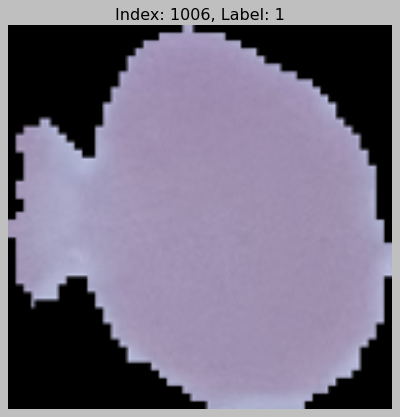

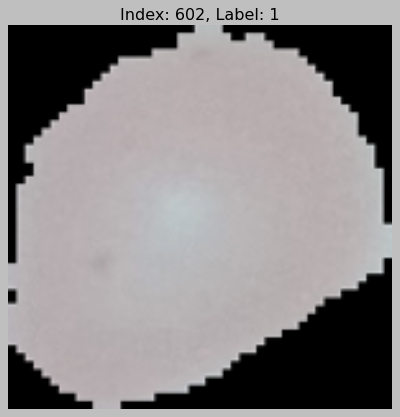

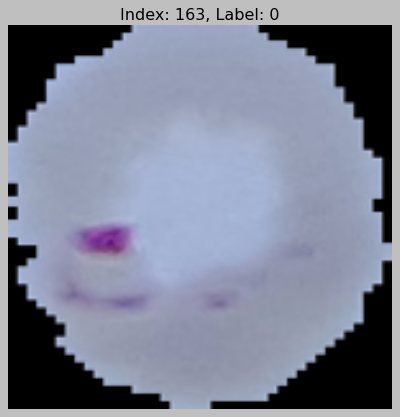

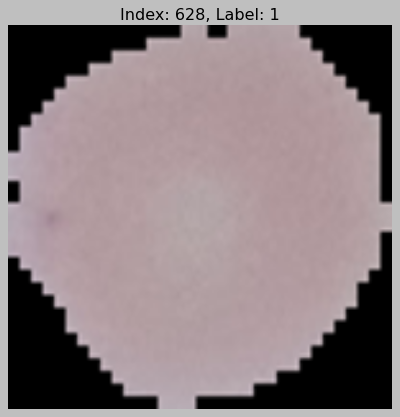

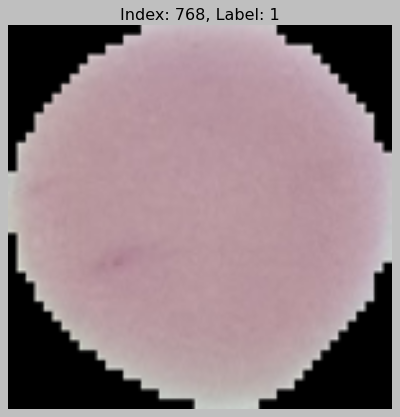

In [53]:
# Assuming you already have the 'dataset' and 'label' arrays
import random

# Assuming you already have the 'dataset' and 'label' arrays

# Generate 5 random indices
random_indices = random.sample(range(len(dataset)), 5)

# Print the random images along with their index and label
for i in random_indices:
    plt.imshow(dataset[i])
    plt.title('Index: ' + str(i) + ', Label: ' + str(label[i]))
    plt.axis('off')
    plt.show()

In [16]:
# Print the head of parasitized images
# print('Head of parasitized images:')
# for image in dataset[label == 0][:5]:
#     plt.imshow(image)
#     plt.axis('off')
#     plt.show()

In [17]:
# Print the head of uninfected images
# print('Head of uninfected images:')
# for image in dataset[label == 1][:5]:
#     plt.imshow(image)
#     plt.axis('off')
#     plt.show()

In [18]:
# Print the head of the dataset
# print('Head of the dataset:')
# for image, label in zip(dataset[:5], label[:5]):
#     plt.imshow(image)
#     plt.title('Label: ' + str(label))
#     plt.axis('off')
#     plt.show()

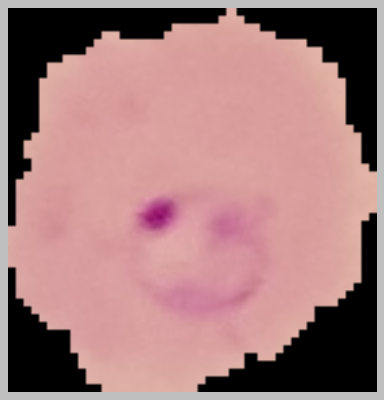

In [5]:
# Display the first image
plt.imshow(image_list[0])
plt.axis('off')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

#Without scaling (normalize) the training may not converge. 
#Normalization is a rescaling of the data from the original range 
#so that all values are within the range of 0 and 1.
from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)


In [25]:
from sklearn.model_selection import train_test_split

if dataset.shape[0] == 0 or label.shape[0] == 0:
    print("Error: Empty dataset or label array.")
else:
    X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.20, random_state=0)
    print("Shapes after train-test split:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)


Shapes after train-test split:
X_train shape: (807, 150, 150, 3)
X_test shape: (202, 150, 150, 3)
y_train shape: (807,)
y_test shape: (202,)


In [26]:
print("Shape of dataset:", dataset.shape)
print("Shape of label:", label.shape)


Shape of dataset: (1009, 150, 150, 3)
Shape of label: (1009,)


In [ ]:
#Do not do one-hot encoding as it generates a shape of (num, 2)
#But the network expects an input of (num, 1) for the last layer for binary classification
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [27]:

###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  
#Do not use softmax for binary classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#But, also good for binary mutually exclusive (cat or not cat). 

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [29]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


model.save('malaria_model_10epochs.h5')

Epoch 1/10
13/13 [==============================] - 8s 581ms/step - loss: 149.1580 - accuracy: 0.5291 - val_loss: 0.9962 - val_accuracy: 0.5990
Epoch 2/10
13/13 [==============================] - 7s 537ms/step - loss: 0.7277 - accuracy: 0.6766 - val_loss: 0.6152 - val_accuracy: 0.6535
Epoch 3/10
13/13 [==============================] - 7s 544ms/step - loss: 0.6045 - accuracy: 0.7113 - val_loss: 0.5633 - val_accuracy: 0.6386
Epoch 4/10
13/13 [==============================] - 7s 565ms/step - loss: 0.8289 - accuracy: 0.6902 - val_loss: 0.8679 - val_accuracy: 0.6337
Epoch 5/10
13/13 [==============================] - 7s 535ms/step - loss: 0.6309 - accuracy: 0.6890 - val_loss: 0.6926 - val_accuracy: 0.6485
Epoch 6/10
13/13 [==============================] - 7s 538ms/step - loss: 0.6413 - accuracy: 0.6183 - val_loss: 0.7807 - val_accuracy: 0.6535
Epoch 7/10
13/13 [==============================] - 7s 540ms/step - loss: 0.6329 - accuracy: 0.6778 - val_loss: 0.5159 - val_accuracy: 0.7129
Epoc

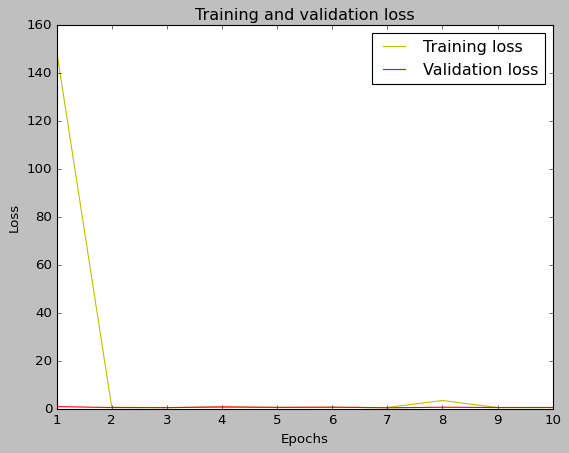

In [30]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

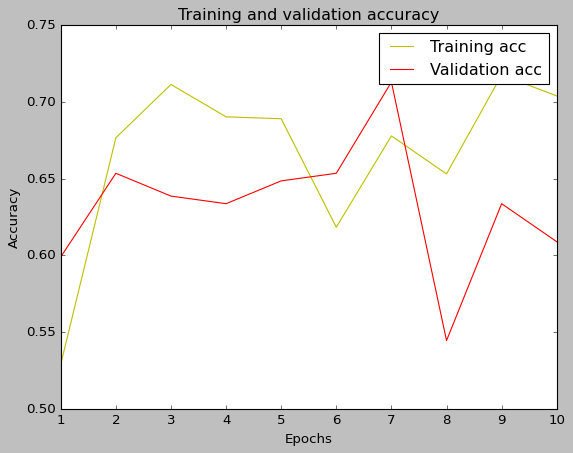

In [35]:
acc = history.history['accuracy']        # Corrected key for training accuracy
val_acc = history.history['val_accuracy']  # Corrected key for validation accuracy

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
#We can load the trained model, so we don't have to train again for 300 epochs!
from keras.models import load_model
# load model
model = load_model('malaria_model_10epochs.h5')

#For 300 epochs, giving .5% accuracy

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

7/7 [==============================] - 1s 62ms/step - loss: 0.6393 - accuracy: 0.6089
Accuracy =  60.89109182357788 %


In [43]:
#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=0.6
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

7/7 [==============================] - 0s 64ms/step
[[63 34]
 [38 67]]


7/7 [==============================] - 0s 57ms/step


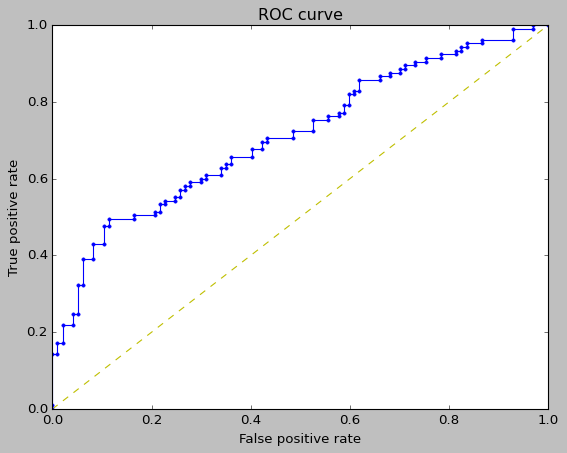

In [39]:
#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative. 
#ROC can help identify the right threshold.
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

"""
#One way to find the best threshold once we calculate the true positive 
and false positive rates is ...
The optimal cut off point would be where “true positive rate” is high 
and the “false positive rate” is low. 
Based on this logic let us find the threshold where tpr-(1-fpr) is zero (or close to 0)
"""

In [44]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

#Now use this threshold value in the confusion matrix to visualize the balance
#between tp, fp, fp, and fn

Ideal threshold is:  43    0.599904
Name: thresholds, dtype: float32


In [45]:
#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier 
#is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.7125184094256259


1/1 [==============================] - 0s 22ms/step
The prediction for this image is:  [[0.94050986]]
The actual label for this image is:  1


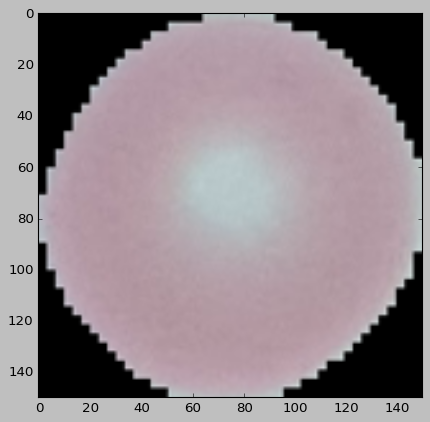

In [63]:
#Test the model on one image (for 300 epochs)
#img 23 is parasitized - correctly predicts near 0 probability
#Img 22, parasitized, correctly lables (low value) but relatively high value.
#img 24 is uninfected, correctly predicts as uninfected
#img 26 is parasitized but incorrectly gives high value for prediction, uninfected.

n=144  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

#Instead f checking for each image, we can evaluate the model on all test data

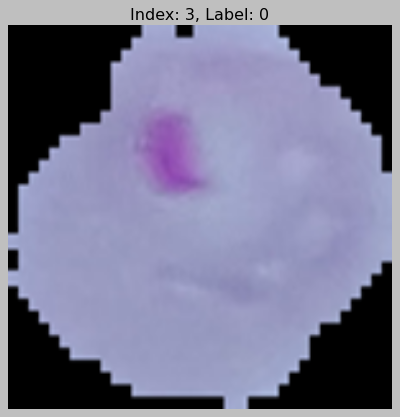

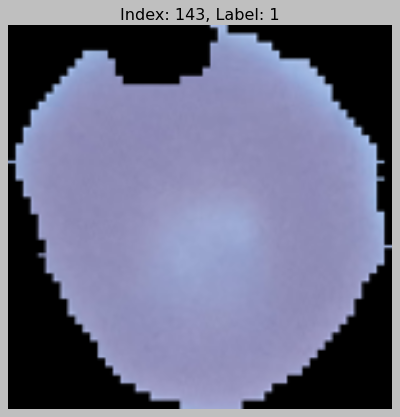

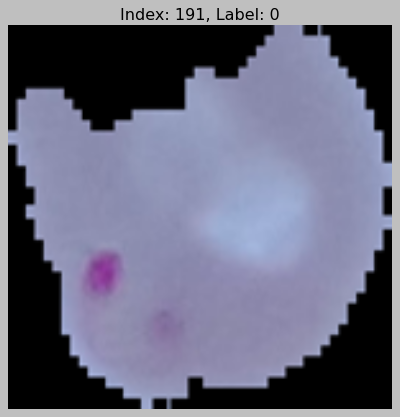

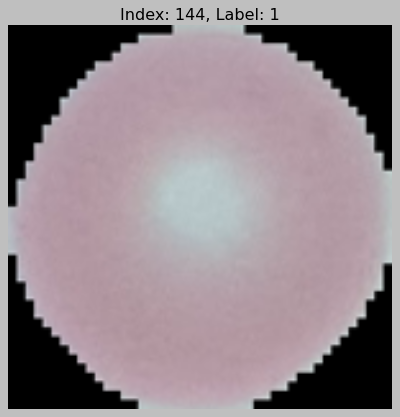

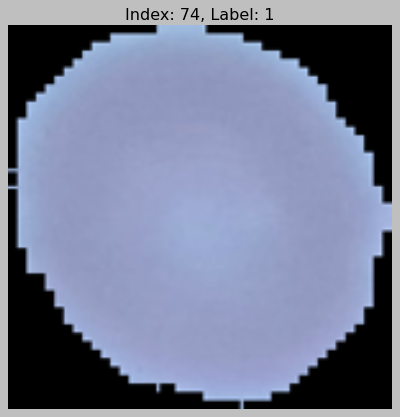

In [57]:
import random

# Assuming you have the X_test and y_test arrays for the test data

# Generate 5 random indices for the test dataset
random_indices_test = random.sample(range(len(X_test)), 5)

# Print the random images from the test dataset along with their index and label
for i in random_indices_test:
    plt.imshow(X_test[i])
    plt.title('Index: ' + str(i) + ', Label: ' + str(y_test[i]))
    plt.axis('off')
    plt.show()
